In [1]:
from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise_array
from src.preprocessing import process_image, process_video
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

ImportError: cannot import name 'generate_noise_list' from 'src.gaussian_noise' (c:\Users\asken\Documents\UCPH\Bachelor\QIM\src\gaussian_noise.py)

In [ ]:
size = 300
thresh = 0.2
smooth = 2.

In [ ]:
im = process_video('images/cheese_gel.avi', threshold=thresh, size=size, skip_size=239)[1]
F, G = analyse_image(im, L=50)
y = F/G

In [ ]:
def model(thresh, smooth):
    noise = generate_noise_list(size=size, threshold=thresh, smooth=smooth, amount=3)
    F, G = analyse_video(noise, L=50)
    return np.mean(F, axis=0)/np.mean(G, axis=0)

def loss_fn(thresh, smooth):
    return np.sum((model(thresh, smooth) - y)**2)

In [ ]:
max_iter = 50
#loss_list = []
step_thresh, step_smooth = (0.01, 0.1)
learning_rate = 0.01

for i in range(max_iter):
    loss = loss_fn(thresh, smooth)
    grad1 = (loss_fn(thresh+step_thresh, smooth)-loss)/step_thresh
    grad2 = (loss_fn(thresh, smooth+step_smooth)-loss)/step_smooth
    
    thresh -= grad1 * learning_rate
    smooth -= grad2 * learning_rate

KeyboardInterrupt: 

In [ ]:
print(smooth)
print(thresh)

1.9986329427209506
0.20294214635494934


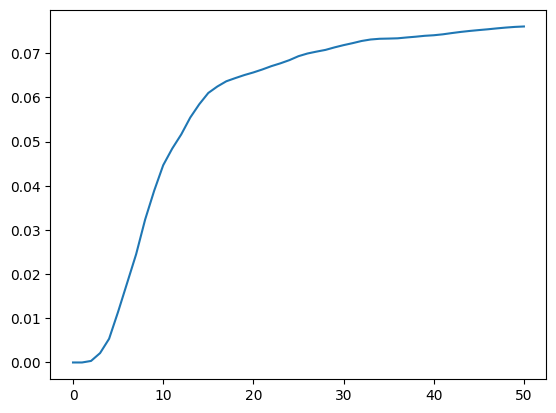

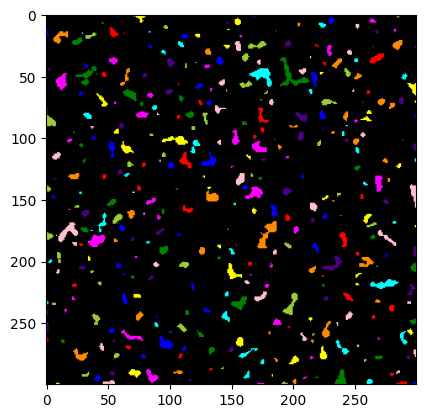

In [ ]:
noise = generate_noise_list(size, threshold=thresh, smooth=smooth, amount=3)
F_noise, G_noise = analyse_video(noise, L=50)
plt.plot(np.mean(F_noise, axis=0)/np.mean(G_noise, axis=0))
plt.show()

plt.imshow(label2rgb(noise[0]))
plt.show()

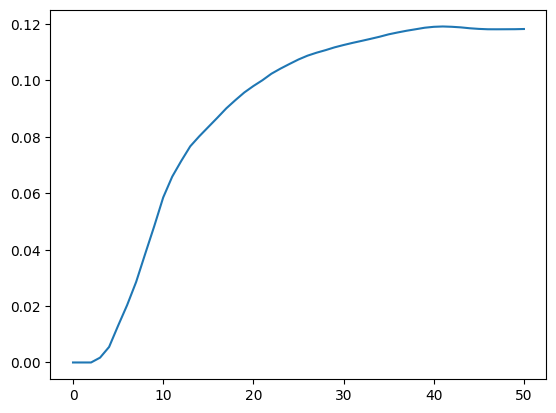

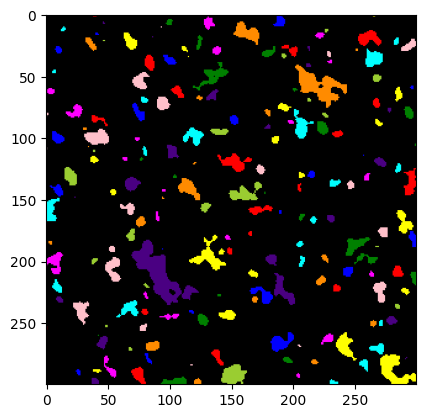

In [ ]:
plt.plot(F/G)
plt.show()

plt.imshow(label2rgb(im))
plt.show()